# Laboratorio 09 Matrices

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm


## Punto 1: **Modelo de encriptación**


Un proceso para encriptar un mensaje secreto es usar cierta matriz cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc. y espacio=27, se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arreglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

```
47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,
```


la primera fila del mensaje es `47,49,-19,257,487`

*¿Cual es el mensaje?*

In [4]:
A = np.array([[1, 2, -3, 4, 5],
              [-2, -5, 8, -8, -9],
              [1, 2, -2, 7, 9],
              [1, 1, 0, 6, 12],
              [2, 4, -6, 8, 11]])

mensaje_cifrado = np.array([47, 49, -19, 257, 487, 10, -9, 63, 137, 236,
                             79, 142, -184, 372, 536, 59, 70, -40, 332, 588])


n_filas = len(mensaje_cifrado) // A.shape[0]

mensaje_cifrado = mensaje_cifrado.reshape(n_filas, A.shape[0])

#inversa de A
A_inv = np.linalg.inv(A)

#decodificar el mensaje multiplicando por la inversa
mensaje_descifrado = np.round(mensaje_cifrado @ A_inv).astype(int)

# Convertir los números a letras (A=1, B=2, ..., espacio=27)
alfabeto = {i: chr(64 + i) for i in range(1, 27)}
alfabeto[27] = " "  # Espacio

# Convertir los números del mensaje en texto
mensaje_texto = ''.join(alfabeto.get(num, '?') for num in mensaje_descifrado.flatten())

print(f"Mensaje descifrado:{mensaje_texto}")

Mensaje descifrado:ARE YOU HAVING FUN  


## Punto 2: **Operaciones matricial con regresión lineal.**

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y minimizar el conjunto de parámetros de la regresión emplando algún método de minimización; otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


$$\Theta = (X^T X)^{-1} X^T y$$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, $X$ la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en $N$ dimensiones; la recta, plano o hiperplano puede ser calculado como:

$$Y=\Theta^T X$$


En el caso de dos dimensiones, supongamos que $X$, e $Y$ presentan un comportamiento lineal, y vienen dados por (en este caso el super indice es):


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

$$\Theta = (X^T X)^{-1} X^T y$$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```

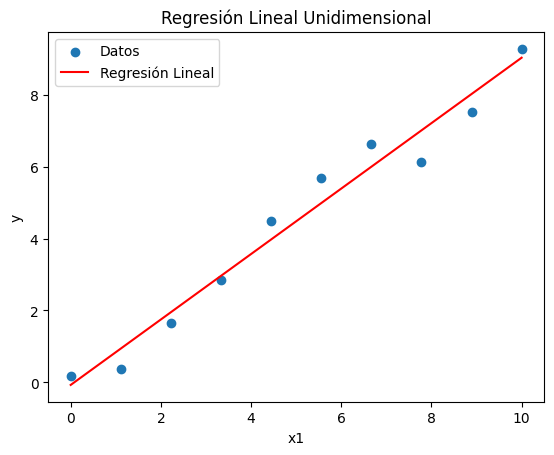

LinAlgError: Singular matrix

In [5]:
#regresión lineal unidimensional
N = 10
x1 = np.linspace(0, 10, N)
noise = 2 * np.random.random(N) - 1
y = 0.9 * x1 + noise

#construcción de la matriz X con columna de unos
X = np.vstack((np.ones(N), x1)).T

#calculo de theta
theta = np.linalg.inv(X.T @ X) @ X.T @ y

#predict
y_pred = X @ theta

# Graficar los datos y la recta ajustada
plt.scatter(x1, y, label="Datos")
plt.plot(x1, y_pred, color='red', label="Regresión Lineal")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.title("Regresión Lineal Unidimensional")
plt.show()

#regresión lineal (2D)
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1 = 2 * np.random.random(N) - 1
noise2 = 2 * np.random.random(N) - 1
y = 2 * (x1 + noise1) - 3 * (x2 + noise2) + 0.0


X = np.vstack((np.ones(N), x1, x2)).T

theta = np.linalg.inv(X.T @ X) @ X.T @ y

#predict
y_pred = X @ theta

# Graficar datos y plano ajustado
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, label="Datos")
X1, X2 = np.meshgrid(x1, x2)
Y_pred = theta[0] + theta[1] * X1 + theta[2] * X2
ax.plot_surface(X1, X2, Y_pred, color='red', alpha=0.5)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("Regresión Lineal Bidimensional")
plt.show()

## Punto 3: **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

a) Diagonalize $A$.

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

Matriz A:
[[ 2 -1  1]
 [ 0  3 -1]
 [ 2  1  3]]

Autovalores:
[4.+0.00000000e+00j 2.+1.68652966e-08j 2.-1.68652966e-08j]

Matriz de autovectores U:
[[-0.57735027+0.00000000e+00j -0.57735027+9.73718355e-09j
  -0.57735027-9.73718355e-09j]
 [ 0.57735027+0.00000000e+00j  0.57735027+0.00000000e+00j
   0.57735027-0.00000000e+00j]
 [-0.57735027+0.00000000e+00j  0.57735027-9.73718355e-09j
   0.57735027+9.73718355e-09j]]

Matriz diagonal D:
[[4.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 2.+1.68652966e-08j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 2.-1.68652966e-08j]]


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


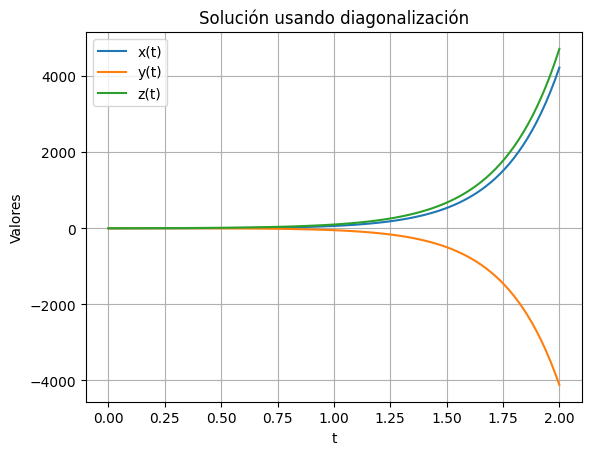

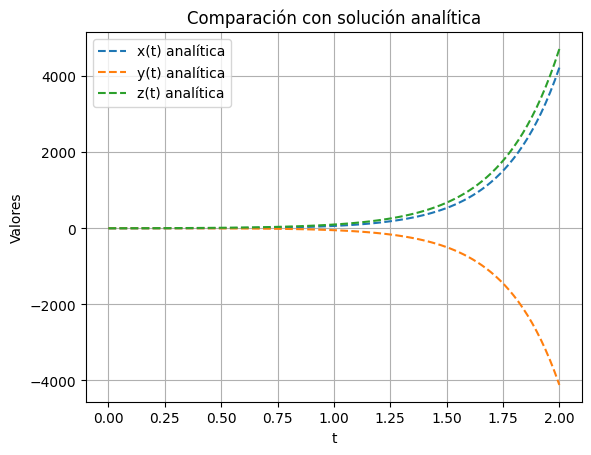

In [7]:
A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])

# a)
vals, U = np.linalg.eig(A)  # Valores y vectores propios
D = np.diag(vals)           # Matriz diagonal con los autovalores
U_inv = np.linalg.inv(U)    # Inversa de la matriz de autovectores

print("Matriz A:")
print(A)
print("\nAutovalores:")
print(vals)
print("\nMatriz de autovectores U:")
print(U)
print("\nMatriz diagonal D:")
print(D)

# b) Resolver x(t), y(t), z(t) en el intervalo [0,2]

def solution(t, r0):
    return U @ np.diag(np.exp(vals * t)) @ U_inv @ r0

# c) Graficar soluciones
r0 = np.array([1, 1, 2])  # Condición inicial
T = np.linspace(0, 2, 100)
solutions = np.array([solution(t, r0) for t in T])

plt.plot(T, solutions[:, 0], label='x(t)')
plt.plot(T, solutions[:, 1], label='y(t)')
plt.plot(T, solutions[:, 2], label='z(t)')
plt.xlabel('t')
plt.ylabel('Valores')
plt.legend()
plt.title('Solución usando diagonalización')
plt.grid()
plt.show()

# d) Comparación con la solución analítica

def analytical_solution(t, r0):
    x0, y0, z0 = r0
    factor = np.exp(2 * t)
    x = (x0 * (factor * (1 + factor - 2*t)) + y0 * (-2*t*factor) + z0 * (factor * (-1 + factor))) / 2
    y = (-x0 * (factor * (-1 + factor - 2*t)) + y0 * (2*(t+1)*factor) - z0 * (factor * (-1 + factor))) / 2
    z = (x0 * (factor * (-1 + factor + 2*t)) + y0 * (2*t*factor) + z0 * (factor * (1 + factor))) / 2
    return np.array([x, y, z])

analytical_solutions = np.array([analytical_solution(t, r0) for t in T])

plt.plot(T, analytical_solutions[:, 0], '--', label='x(t) analítica')
plt.plot(T, analytical_solutions[:, 1], '--', label='y(t) analítica')
plt.plot(T, analytical_solutions[:, 2], '--', label='z(t) analítica')
plt.xlabel('t')
plt.ylabel('Valores')
plt.legend()
plt.title('Comparación con solución analítica')
plt.grid()
plt.show()

## Punto 4: **Modelo de población de una especie de pajaros**
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1)
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que:

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix}
0 & 2 \\
0.3 & 0.5
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A

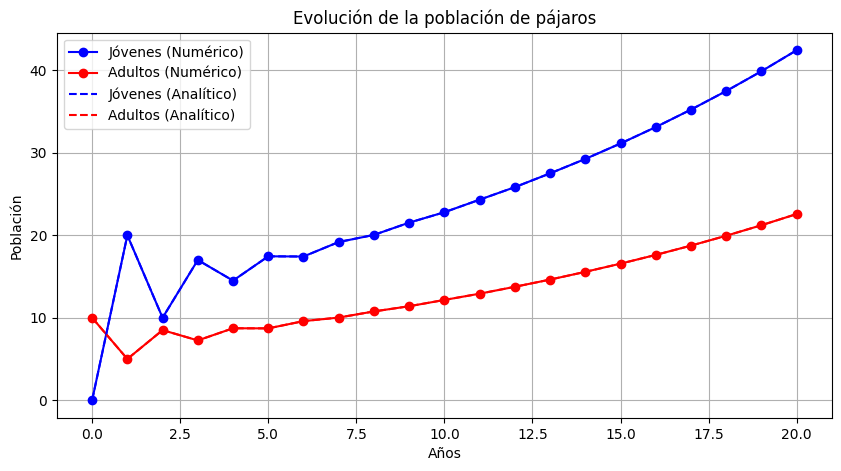

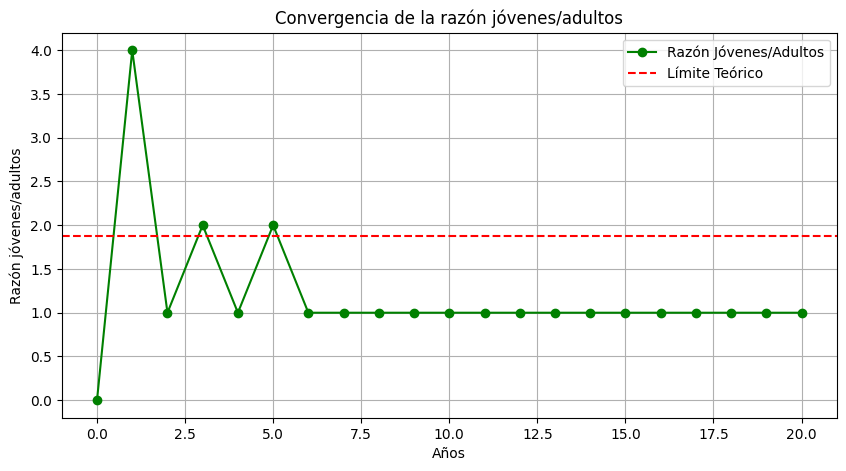

In [8]:
A = np.array([[0, 2], [0.3, 0.5]])
p0 = np.array([0, 10])  # 10 hembras adultas, 0 jóvenes

# iteraciones
n_max = 20
p_hist = [p0]

def evolucion_poblacion(A, p0, n_max):
    p_hist = [p0]
    for _ in range(n_max):
        p_next = A @ p_hist[-1]
        p_hist.append(p_next)
    return np.array(p_hist)


p_hist = evolucion_poblacion(A, p0, n_max)

p_jovenes = p_hist[:, 0]
p_adultos = p_hist[:, 1]

razon_juvenil_adultos = np.floor(p_jovenes / p_adultos)

#encontrar solución analítica
eigvals, eigvecs = np.linalg.eig(A)
lambda_1, lambda_2 = eigvals
v1, v2 = eigvecs[:, 0], eigvecs[:, 1]

#coeficientes a1 y a2 para la descomposición inicial
a1, a2 = np.linalg.solve(eigvecs, p0)

p_analitica = np.array([a1 * (lambda_1**n) * v1 + a2 * (lambda_2**n) * v2 for n in range(n_max+1)])

# Gráficas
t = np.arange(n_max + 1)
plt.figure(figsize=(10, 5))
plt.plot(t, p_jovenes, 'bo-', label='Jóvenes (Numérico)')
plt.plot(t, p_adultos, 'ro-', label='Adultos (Numérico)')
plt.plot(t, p_analitica[:, 0], 'b--', label='Jóvenes (Analítico)')
plt.plot(t, p_analitica[:, 1], 'r--', label='Adultos (Analítico)')
plt.xlabel('Años')
plt.ylabel('Población')
plt.legend()
plt.title('Evolución de la población de pájaros')
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(t, razon_juvenil_adultos, 'go-', label='Razón Jóvenes/Adultos')
plt.axhline(y=1.88, color='r', linestyle='--', label='Límite Teórico')
plt.xlabel('Años')
plt.ylabel('Razón jóvenes/adultos')
plt.legend()
plt.title('Convergencia de la razón jóvenes/adultos')
plt.grid()
plt.show()

#Punto 5: Sistemas de ecuaciones
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

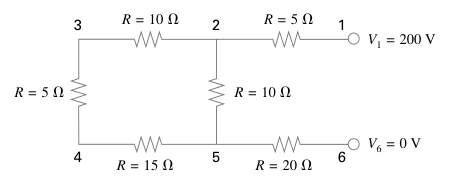